In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


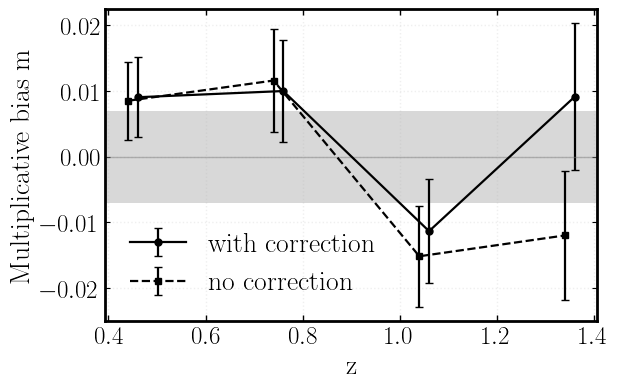

In [2]:
# ----- Data you provided -----
# Redshift bin edges and centers
zbounds = np.array([0.3, 0.6, 0.9, 1.2, 1.5])
z_centers = 0.5 * (zbounds[:-1] + zbounds[1:])   # [0.45, 0.75, 1.05, 1.35]

# Case A: with correction
m_with = np.array([ 0.00905089,  0.00999631, -0.0113418 ,  0.00914631])
e_with_raw = np.array([0.00403822, 0.00514945, 0.00525115, 0.00745598])

# Case B: no correction
m_noc = np.array([ 0.00850967,  0.01159585, -0.0151666 , -0.01198867])
e_noc_raw = np.array([0.00393024, 0.00521292, 0.00511598, 0.00657876])

# ----- apply factor 1.5 to errors -----
e_with = 1.5 * e_with_raw
e_noc  = 1.5 * e_noc_raw

# (no underflow/overflow bins here, so we keep all points)
z_plot   = z_centers
m_with_p = m_with
e_with_p = e_with
m_noc_p  = m_noc
e_noc_p  = e_noc

# ----- Plot -----
fig, ax = plt.subplots(figsize=(6.5, 4.2))

# shaded tolerance band |m| < 0.003
ax.axhspan(-0.007, 0.007, facecolor="gray", alpha=0.3, zorder=0)

# with correction: solid black, circle markers
ax.errorbar(
    z_plot+0.01, m_with_p, yerr=e_with_p,
    fmt='o', linestyle='-', color='black',
    linewidth=1.6, markersize=5, capsize=3,
    label='with correction'
)

# no correction: dashed black, square markers
ax.errorbar(
    z_plot-0.01, m_noc_p, yerr=e_noc_p,
    fmt='s', linestyle='--', color='black',
    linewidth=1.6, markersize=5, capsize=3,
    label='no correction'
)

ax.set_xlabel("z")
ax.set_ylabel("Multiplicative bias m")
ax.axhline(0.0, color='gray', linewidth=1, alpha=0.5)
ax.legend(frameon=False)
ax.grid(alpha=0.2, linestyle=':')
fig.tight_layout()
plt.show()